<a href="https://colab.research.google.com/github/Akshata1992/TensorFlow/blob/master/TF2_0_RNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
#Import all necessary packages
from tensorflow.keras.layers import SimpleRNN,Dense,Flatten,Input,GRU,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load in the MNIST
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print("X_train shape: ",x_train.shape,"x_test: ",x_test.shape)

X_train shape:  (60000, 28, 28) x_test:  (10000, 28, 28)


In [ ]:
#Build the Functional API

i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

In [ ]:
#compile and fit the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3424 - accuracy: 0.8899 - val_loss: 0.1281 - val_accuracy: 0.9602
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1040 - accuracy: 0.9687 - val_loss: 0.0836 - val_accuracy: 0.9746
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0718 - accuracy: 0.9782 - val_loss: 0.0767 - val_accuracy: 0.9774
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0730 - val_accuracy: 0.9773
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0689 - val_accuracy: 0.9786
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0543 - val_accuracy: 0.9832
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0465 - val_accuracy:

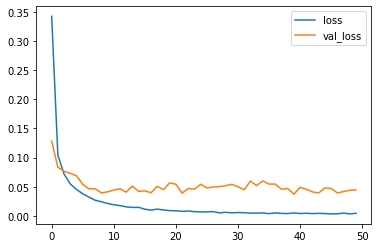

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

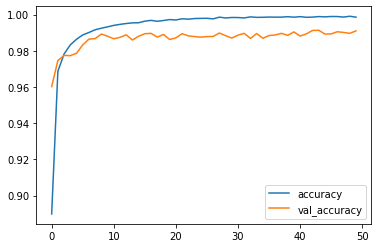

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1130    1    1    0    1    1    0    1    0]
 [   1    0 1030    0    0    0    0    1    0    0]
 [   0    0    5 1000    0    1    0    2    2    0]
 [   0    0    1    0  975    0    0    1    0    5]
 [   2    1    1    2    1  879    2    2    2    0]
 [   2    2    0    0    1    1  950    0    1    1]
 [   0    3    9    0    0    0    0 1014    0    2]
 [   2    0    3    1    0    3    0    2  963    0]
 [   1    0    0    1   10    0    0    3    1  993]]


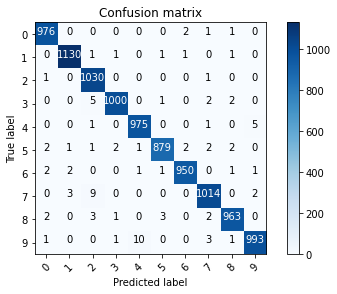

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

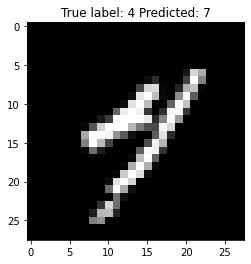

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));